### Kaggle
https://www.kaggle.com/c/cassava-leaf-disease-classification

### Kind of disease
- label_num_to_disease_map.json에 담겨 있음
```json
{
    "root":{
        "0": "Cassava Bacterial Blight (CBB)"
        "1": "Cassava Brown Streak Disease (CBSD)"
        "2": "Cassava Green Mottle (CGM)"
        "3": "Cassava Mosaic Disease (CMD)"
        "4": "Healthy"
     }
}
```

In [1]:
# class 이름 목록을 json 파일로부터 로드
import json

class_names = {}
with open('dataset/label_num_to_disease_map.json') as json_file:
    json_data = json.load(json_file)
    class_names = json_data

### train.csv 분석

In [2]:
import pandas as pd

train_df = pd.read_csv('dataset/train.csv')

In [3]:
train_df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [4]:
# Disease별 1개의 row 가져오기
def pick_one_record(df, disease_label = 0):
    filtered_df = df.loc[df['label'] == disease_label]
    return filtered_df.iloc[[0]].to_dict(orient='records')[0]

In [5]:
sample_images = []
for i in range(0, 5):
    record = pick_one_record(train_df, i)
    sample_images.append(record)
print('.. sample_images')
sample_images

.. sample_images


[{'image_id': '1000015157.jpg', 'label': 0},
 {'image_id': '100042118.jpg', 'label': 1},
 {'image_id': '1000910826.jpg', 'label': 2},
 {'image_id': '1000201771.jpg', 'label': 3},
 {'image_id': '1001723730.jpg', 'label': 4}]

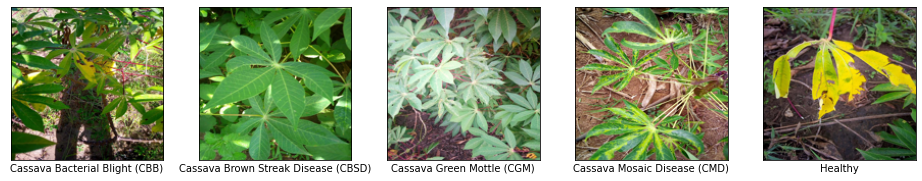

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

img_height, img_width = 150, 150

plt.figure(figsize=(50, 50))
for i in range(5):
    plt.subplot(15, 15, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    image_path = 'dataset/train_images/' + sample_images[i]['image_id']
    image = np.array(Image.open(image_path).resize((img_height, img_width)))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[str(sample_images[i]['label'])], wrap=True)
plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
import os

In [8]:
def separate_image_n_labels(df, root_dir):
    # Keras를 활용하여 이미지 및 라벨 train 데이터 로딩
    img_height, img_width = 150, 150

    count = 0
    images = []
    labels = []

    print('.. Start to parse df')
    for (i, row) in df.iterrows():
        if (i % 1000) is 0:
            print('.', end='')
        image_path = os.path.join(root_dir, row['image_id'])

        # 150x150 사이즈로 이미지를 로드
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

        # PIL.Image를 numpy array 형태로 변경
        image_arr = keras.preprocessing.image.img_to_array(image)
        image_arr = np.array([image_arr]) 

        # 픽셀 값을 0~1 사이로 정규화
        image_arr = image_arr / 255.0

        images.append(image_arr)
        labels.append(row['label'])

    print()
    print('.. End to parse df')
    print('Count of images:', len(images))
    return images, labels

In [10]:
# train 이미지, 라벨 로딩
train_images, train_labels = separate_image_n_labels(train_df, 'dataset/train_images')
train_images[0]

.. Start to parse df
......................
.. End to parse df
Count of images: 21397


array([[[[0.14117648, 0.34509805, 0.42745098],
         [0.15294118, 0.3254902 , 0.36862746],
         [0.12941177, 0.34901962, 0.3372549 ],
         ...,
         [0.30588236, 0.3647059 , 0.23529412],
         [0.15294118, 0.20784314, 0.10588235],
         [0.15686275, 0.22745098, 0.03137255]],

        [[0.10588235, 0.33333334, 0.34901962],
         [0.12156863, 0.31764707, 0.34509805],
         [0.14901961, 0.35686275, 0.3882353 ],
         ...,
         [0.10196079, 0.07058824, 0.01960784],
         [0.10588235, 0.07843138, 0.00784314],
         [0.10196079, 0.07450981, 0.        ]],

        [[0.16862746, 0.34509805, 0.3254902 ],
         [0.13725491, 0.34901962, 0.34901962],
         [0.09019608, 0.31764707, 0.33333334],
         ...,
         [0.45882353, 0.60784316, 0.18039216],
         [0.30588236, 0.42352942, 0.18039216],
         [0.45490196, 0.59607846, 0.20392157]],

        ...,

        [[0.0627451 , 0.19215687, 0.00784314],
         [0.07450981, 0.1882353 , 0.00784314]

In [11]:
test_df = pd.read_csv('dataset/sample_submission.csv')
test_df

,image_id,label
0,2216849948.jpg,4


In [12]:
# test 이미지, 라벨 로딩
test_images, test_labels = separate_image_n_labels(test_df, 'dataset/test_images')
test_images[0]

.. Start to parse df
.
.. End to parse df
Count of images: 1


array([[[[0.49803922, 0.5137255 , 0.44705883],
         [0.67058825, 0.7294118 , 0.654902  ],
         [0.43137255, 0.52156866, 0.45882353],
         ...,
         [0.61960787, 0.7254902 , 0.5176471 ],
         [0.67058825, 0.79607844, 0.6       ],
         [0.69803923, 0.7882353 , 0.5764706 ]],

        [[0.7294118 , 0.78431374, 0.7882353 ],
         [0.85490197, 0.8784314 , 0.8784314 ],
         [0.7490196 , 0.79607844, 0.7490196 ],
         ...,
         [0.5921569 , 0.6745098 , 0.41960785],
         [0.56078434, 0.6431373 , 0.49019608],
         [0.6313726 , 0.7019608 , 0.5372549 ]],

        [[0.49411765, 0.5647059 , 0.5019608 ],
         [0.3137255 , 0.30588236, 0.30980393],
         [0.6666667 , 0.69803923, 0.6392157 ],
         ...,
         [0.3882353 , 0.52156866, 0.22352941],
         [0.6392157 , 0.74509805, 0.6156863 ],
         [0.5372549 , 0.6901961 , 0.5058824 ]],

        ...,

        [[0.0627451 , 0.16078432, 0.08627451],
         [0.05882353, 0.14901961, 0.07843138]

In [13]:
print(train_images[0].shape)
print(test_images[0].shape)

(1, 150, 150, 3)
(1, 150, 150, 3)


In [14]:
def concate_4d_array_list(my_3d_list):
    return np.concatenate(my_3d_list, axis=0)

In [15]:
train_images = concate_4d_array_list(train_images)
test_images = concate_4d_array_list(test_images)

In [16]:
print(train_images.shape)
print(test_images.shape)

(21397, 150, 150, 3)
(1, 150, 150, 3)


In [17]:
def concate_1d_array_list(my_list):
    return np.array(my_list)

In [18]:
train_labels = concate_1d_array_list(train_labels)
test_labels = concate_1d_array_list(test_labels)

In [19]:
print(train_labels.shape)
print(train_labels.shape)

(21397,)
(21397,)


### 방법론#1 - CNN

In [20]:
from tensorflow.keras import layers, models

In [21]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(10, activation='softmax'))

In [22]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [23]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_cnn = model_cnn.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
669/669 [==============================] - 495s 739ms/step - loss: 1.1853 - accuracy: 0.6127 - val_loss: 1.5958 - val_accuracy: 0.0000e+00
Epoch 2/5
669/669 [==============================] - 454s 679ms/step - loss: 0.9961 - accuracy: 0.6448 - val_loss: 2.9212 - val_accuracy: 0.0000e+00
Epoch 3/5
669/669 [==============================] - 448s 669ms/step - loss: 0.9004 - accuracy: 0.6670 - val_loss: 1.7318 - val_accuracy: 0.0000e+00
Epoch 4/5
669/669 [==============================] - 447s 667ms/step - loss: 0.7927 - accuracy: 0.7087 - val_loss: 1.8665 - val_accuracy: 0.0000e+00
Epoch 5/5
669/669 [==============================] - 444s 664ms/step - loss: 0.5849 - accuracy: 0.7813 - val_loss: 2.7807 - val_accuracy: 0.0000e+00


In [24]:
def draw_history_graph(epochs, history, model_title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(model_title + ' - Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(model_title + ' - Training and Validation Loss')
    plt.show()

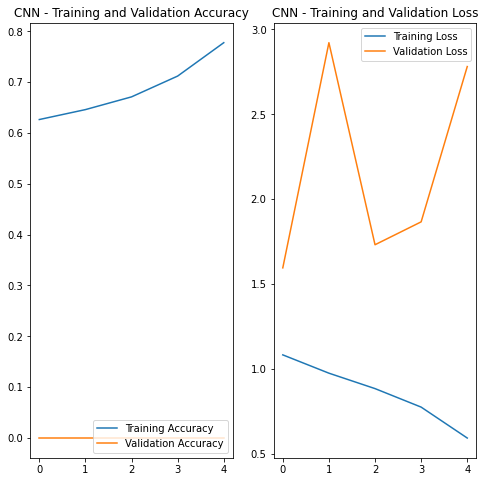

In [25]:
draw_history_graph(5, history_cnn, 'CNN')

In [26]:
test_cnn_loss, test_cnn_acc = model_cnn.evaluate(test_images, test_labels, verbose=2)
print('\nCNN 테스트 정확도:', test_cnn_acc)

1/1 - 0s - loss: 2.7807 - accuracy: 0.0000e+00

CNN 테스트 정확도: 0.0


In [27]:
# 저장
model_cnn.save("my_model_cnn")

INFO:tensorflow:Assets written to: my_model_cnn\assets


### train data를 절반만 사용하도록 변경

In [28]:
def separate_image_n_labels_2(df, root_dir):
    img_height, img_width = 150, 150

    count = 0
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []

    print('.. Start to parse df: half test, train')
    for (i, row) in df.iterrows():
        if (i % 1000) is 0:
            print('.', end='')
        image_path = os.path.join(root_dir, row['image_id'])

        # 150x150 사이즈로 이미지를 로드
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

        # PIL.Image를 numpy array 형태로 변경
        image_arr = keras.preprocessing.image.img_to_array(image)
        image_arr = np.array([image_arr]) 

        # 픽셀 값을 0~1 사이로 정규화
        image_arr = image_arr / 255.0

        if (i % 2) is 0:
            test_images.append(image_arr)
            test_labels.append(row['label'])
        else:
            train_images.append(image_arr)
            train_labels.append(row['label'])

    print()
    print('.. End to parse df: half test, train')
    print('Count of images:', len(test_images) + len(train_images))
    return train_images, train_labels, test_images, test_labels

In [29]:
# test 이미지, 라벨 로딩
half_train_images, half_train_labels, half_test_images, half_test_labels = separate_image_n_labels_2(\
                                                                                train_df, 'dataset/train_images')
print('size of half_train_images:', len(half_train_images), ', size of half_test_images:', len(half_test_images))

.. Start to parse df: half test, train
......................
.. End to parse df: half test, train
Count of images: 21397
size of half_train_images: 10698 , size of half_test_images: 10699


In [30]:
half_train_images = concate_4d_array_list(half_train_images)
half_test_images = concate_4d_array_list(half_test_images)

In [31]:
print(half_train_images.shape)
print(half_test_images.shape)

(10698, 150, 150, 3)
(10699, 150, 150, 3)


In [32]:
half_train_labels = concate_1d_array_list(half_train_labels)
half_test_labels = concate_1d_array_list(half_test_labels)

In [33]:
print(half_train_labels.shape)
print(half_test_labels.shape)

(10698,)
(10699,)


### 방법론#1 - CNN : half 대상으로

In [34]:
half_model_cnn = models.Sequential()
half_model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
half_model_cnn.add(layers.MaxPooling2D((2, 2)))
half_model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
half_model_cnn.add(layers.MaxPooling2D((2, 2)))
half_model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
half_model_cnn.add(layers.Flatten())
half_model_cnn.add(layers.Dense(64, activation='relu'))
half_model_cnn.add(layers.Dense(10, activation='softmax'))

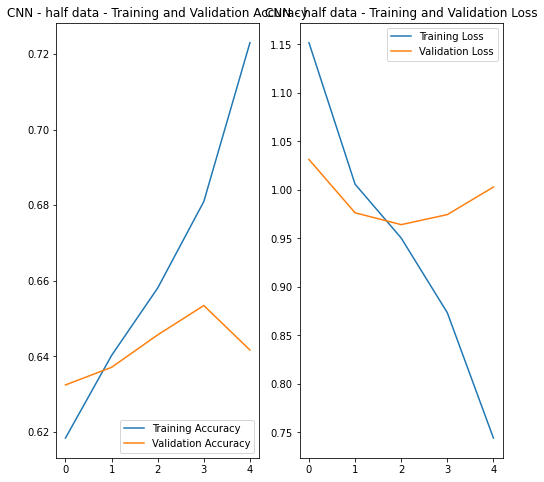

In [36]:
draw_history_graph(5, half_history_cnn, 'CNN - half data')

In [39]:
test_cnn_loss, test_cnn_acc = half_model_cnn.evaluate(half_test_images, half_test_labels, verbose=2)
print('\nHalf 데이터 대상 CNN 테스트 정확도:', test_cnn_acc)

335/335 - 59s - loss: 1.0030 - accuracy: 0.6416

Half 데이터 대상 CNN 테스트 정확도: 0.6416487693786621


### 방법론#2 - Object-Detection : half 대상으로

In [59]:
# Object-Detection 학습 위한 클래스별 이미지 5개 뽑아오는 메소드
def pick_five_records(df, disease_label = 0):
    filtered_df = df.loc[df['label'] == disease_label]
    records = []
    count = 0
    for i in range(len(filtered_df)):
        if count is 5:
            break
        records.append(filtered_df.iloc[[i]].to_dict(orient='records')[0])
        count += 1
    return records

In [70]:
import os
import shutil

# 이미지를 'dataset/od_sample_images'에 복사
for i in range(0, 5):
    records = pick_five_records(train_df, i)
    print('className: ' + str(i))
    print('..', end='')
    for record in records:
        print(record['image_id'], end=' ')
        shutil.copy('dataset/train_images/' + record['image_id'], 'dataset/od_sample_images')
    print('')
        
dir_od_sample_images = os.listdir('dataset/od_sample_images')
print(len(dir_od_sample_images)) # 5 class * 5 images for each class = 25
print(class_names)

className: 0
..1000015157.jpg 1001320321.jpg 1003888281.jpg 1012426959.jpg 1018973237.jpg 
className: 1
..100042118.jpg 1000723321.jpg 1002088496.jpg 1004389140.jpg 1008142548.jpg 
className: 2
..1000910826.jpg 1003218714.jpg 100472565.jpg 1004826518.jpg 1005200906.jpg 
className: 3
..1000201771.jpg 1000812911.jpg 1000837476.jpg 1001742395.jpg 1001749118.jpg 
className: 4
..1001723730.jpg 1003442061.jpg 100560400.jpg 1009126931.jpg 1010806468.jpg 
25
{'0': 'Cassava Bacterial Blight (CBB)', '1': 'Cassava Brown Streak Disease (CBSD)', '2': 'Cassava Green Mottle (CGM)', '3': 'Cassava Mosaic Disease (CMD)', '4': 'Healthy'}


In [75]:
# From https://github.com/datitran/raccoon_dataset/
import glob
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [82]:
xml_df = xml_to_csv('dataset/od_labeling')
xml_df.to_csv('dataset/od/train_labels.csv', index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


https://github.com/datitran/raccoon_dataset/blob/master/generate_tfrecord.py 를 통해서 csv를 tfrecord 파일로 변환
```bash
$ python generate_tfrecord.py --csv_input=dataset/od/tain_labels.csv --output_path=dataset/od/train.record --image_dir=dataset/od_sample_images
```